In [7]:
!pip install spacy
import os
import re
import pandas as pd
import spacy
import string

  Using cached thinc-7.4.5-cp38-cp38-win_amd64.whl (910 kB)
  Using cached srsly-1.0.5-cp38-cp38-win_amd64.whl (178 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.3
    Uninstalling srsly-2.4.3:
      Successfully uninstalled srsly-2.4.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\kseht\\anaconda3\\Lib\\site-packages\\~~sly\\msgpack\\_packer.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'thinc.neural'

In [8]:
path = 'C:/Users/kseht/Desktop/UH Spring 2022/Advance NLP/Project/Dataset/Defoe/Defoe'

In [9]:
os.chdir(path)

In [10]:
text_list = []
file_name = []

for file in os.listdir():
    f= open(file, errors = "ignore")
#     print(f.read())
#     print('File name is : ', file)
    text = f.read().replace('\n', ' ')
    text = text.replace('\t',' ')
    text = text.replace('   ', ' ')
    text = text.replace('  ', ' ')
    text = text.replace('[', '')
    text = text.replace(']', '')
    text = text.replace("'", "")
    text = text.replace(".nf", "")
    text = text.replace("!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n", '')
    text = text.replace('.”', '”.').replace('."', '".').replace('?”', '”?').replace('!”', '”!')
    text = text.replace('--', ' ').replace('. . .', '').replace('_', '')
    #removing numbers
    text = re.sub('\d+', '',text)
    # removing the bullets
    text = re.sub('[(\s][0-9a-zA-Z][.)]\s+|[(\s][ivxIVX]+[.)]\s+', ' ', text)
    #removing all the URL from the text
    text = re.sub('(www|http)\S+', '',text)
    # removing the special characters
    text = re.sub('(å¼«¥ª°©ð±§µæ¹¢³¿®ä£)\S+','', text)
#     text = re.sub("[\<103D-Legio-5M The Memorial Exami¹d\>]+", '', text) 
    text = re.sub("#\w+", '', text)
#     text = re.sub("[.nf]", '', text)
    #extracting symbols and characters
    text=re.sub(r'@\w+',"",text)
    text=re.sub(r'#\w+',"",text) 
    text=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text) 
    punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""

#     text=re.sub('[^A-Za-z\s]+',"", text)
#     text = text.lower()
#     text = text.split()
#     print(text)
#     print('File name is : ', file)

    # Removed the sentences having length less then 5
    #sentences = [sent for sent in sentences if len(sent) >= 5]
    #text_list.append(sentences)
#     text=text.lower()
    text_list.append(text)
    file_name.append(file)

print(text_list)
print(file_name)


[' That no Age can parallel the Moderation of the present Government, the Contempt of snarling Enemies, their Disregard of Slander and intolerable Insolence, are Testimonies beyond Exception. The Daily Insults of a Party, which the Government may, and which some think they ought to resent, are most unaccountable. The Loose the hot Men of this Party give to their Tongues, even in the most Sacred Place the Church, the Sacred Office of the Pulpit; and their common, Discourse is such, as no Government but this, would ever bear with; a clear and apparent Proof that the Queen and the Ministry, act by those Principles of Temper and Moderation, that they at the fame Time perswade the Nation to. But, as if the Party were resolved to try the Extent of Royal Patience, and see, how long the Queen may be insulted; and These the Government ridicul¹d before Her Majesty can be provok¹d to shew her just Resentment such Sfage calls for. We have now publish¹d a Pamphlet, entituled, The Memorial of the Ch

In [11]:
data = {'File Name' : file_name,
       'Text' : text_list}
test_df = pd.DataFrame(data)
test_df

File Name                                               Text
0        103D   That no Age can parallel the Moderation of th...
1        112D    REMARKS ON THE BILL TO PREVENT FRAUDS COMMIT...
2        113D    Remark on the Letter of the Author of the St...
3        115D    This Satyr had never been Publishd, tho some...
4        156D    Advice to the Electors of Great Britain; occ...
..        ...                                                ...
143       87D    CASSANDRA ANSWERD.  WHEN a Man is big with h...
144       88D    To the Knights, Cttzzens and Burgesses in Pa...
145       92D    THE WRITINGS OF DANIEL DEFOE PERSECUTION ANA...
146       95D     Blackwell-Hall  A HINT To The Blackwell-Hal...
147       99D    Advice To All Parties He that gives his Advi...

[148 rows x 2 columns]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(test_df['Text'])

In [24]:
print(X)

  (0, 2988)	0.0015208305243123244
  (0, 9758)	0.001551827221085171
  (0, 12185)	0.004956594830174586
  (0, 9930)	0.006070986340306878
  (0, 4682)	0.004072932964174563
  (0, 21453)	0.00765440617811139
  (0, 16814)	0.003373174992370075
  (0, 1176)	0.005656352801979074
  (0, 24942)	0.007070013028373036
  (0, 10463)	0.006655379490045232
  (0, 11872)	0.0039031733527640127
  (0, 10104)	0.0035291422416050284
  (0, 26995)	0.00765440617811139
  (0, 23906)	0.003373174992370075
  (0, 1447)	0.002776515463498185
  (0, 6169)	0.005071959652240721
  (0, 22981)	0.002636926695611502
  (0, 19033)	0.0036582994258467596
  (0, 14379)	0.004335711355482148
  (0, 1276)	0.003488539814436209
  (0, 2678)	0.005197368353618981
  (0, 15095)	0.003800180201926913
  (0, 166)	0.0039031733527640127
  (0, 13396)	0.0048497836881019555
  (0, 48)	0.006333764731614463
  :	:
  (147, 10858)	0.01650608886920624
  (147, 24755)	0.06517938347039676
  (147, 15519)	0.0269615317090358
  (147, 14715)	0.0046447365527009414
  (147, 16115

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [33]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = test_df['Text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [34]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

27493
['confird', 'confirm', 'confirmation', 'confirmations', 'confirmd', 'confirmed', 'confirming', 'confirms', 'confirm¹d', 'confirmíd', 'confiscate', 'confiscated', 'confiscating', 'confiscation', 'conflagration', 'conflgrantion', 'conflict', 'conflicts', 'confliting', 'confluence', 'conflux', 'conform', 'conformable', 'conformd', 'conformed', 'conforming', 'conformist', 'conformity', 'conforms', 'conform¹d', 'confound', 'confounded', 'confounding', 'confounds', 'confront', 'confronted', 'confucius', 'confum¹d', 'confum¹d¹', 'confusd', 'confuse', 'confused', 'confuses', 'confusion', 'confusions', 'confus¹d', 'confusíd', 'confutation', 'confutations', 'confute', 'confuted', 'confutes', 'confuting', 'congeal', 'congo', 'congratualte', 'congratulate', 'congratulated', 'congratulating', 'congratulation', 'congratulations', 'congregation', 'congregations', 'congress', 'congruity', 'coningsby', 'coningsech', 'conjecture', 'conjectured', 'conjectures', 'conjoind', 'conjoined', 'conjoins', 

In [35]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [36]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

17226
['aa', 'aachterhous', 'aafraid', 'aar', 'aaron', 'ab', 'ababdib', 'abadon', 'abal', 'aband', 'abandon', 'abandond', 'abat', 'abaziah', 'abbarkd', 'abberdowr', 'abbey', 'abbeylam', 'abbot', 'abbotrul', 'abbrevi', 'abd', 'abdic', 'abdm', 'abe', 'abel', 'aber', 'abercairni', 'aberdeen', 'aberdeenshir', 'aberladi', 'abet', 'abett', 'abettor', 'abher', 'abhor', 'abhord', 'abhorr', 'abhorrd', 'abib', 'abid', 'abigail', 'abil', 'abillity', 'abimilech', 'abiram', 'abject', 'abjur', 'abjurd', 'abjus']


In [37]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

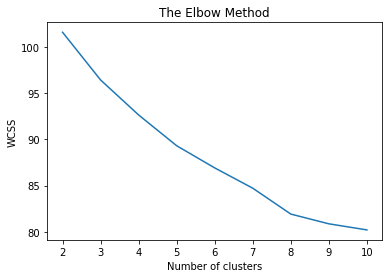

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

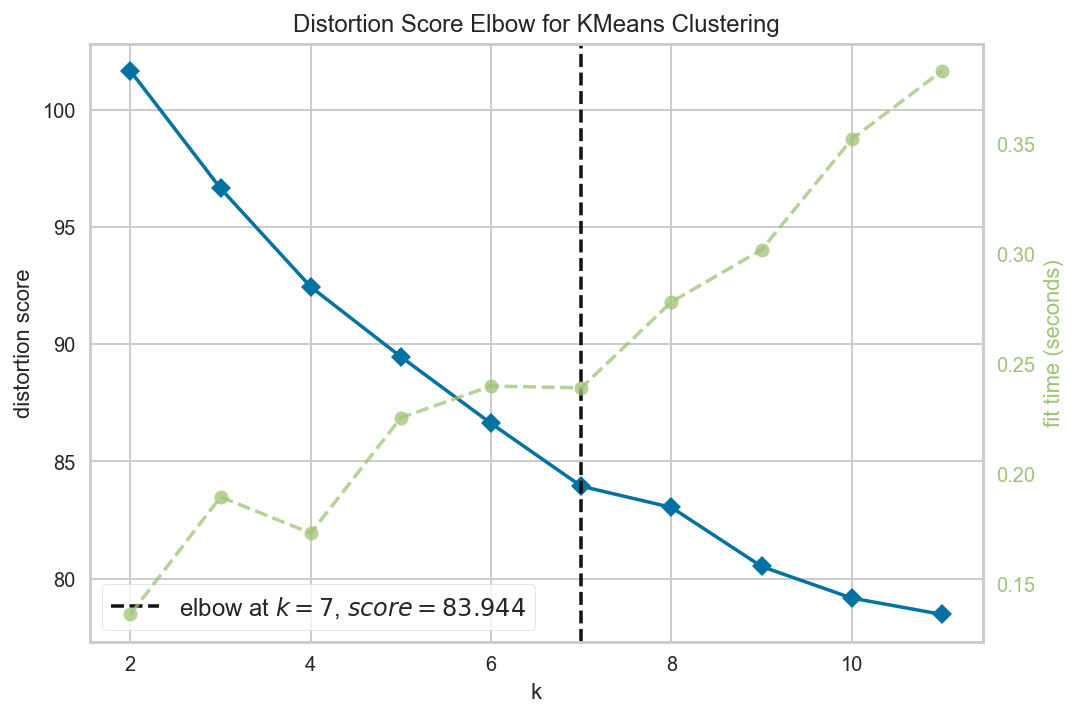

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12)).fit(X3)
visualizer.show()

In [42]:
print(words[250:300])

['draw', 'drawn', 'duke', 'dure', 'dutch', 'duti', 'e', 'earl', 'earnest', 'earth', 'easi', 'easili', 'east', 'effect', 'effectu', 'elect', 'els', 'em', 'emin', 'emperor', 'empir', 'employ', 'employd', 'encourag', 'encreas', 'end', 'endeavour', 'enemi', 'engag', 'england', 'english', 'enjoy', 'enquir', 'enquiri', 'enter', 'entertain', 'entir', 'equal', 'error', 'escap', 'especi', 'establish', 'estat', 'europ', 'everi', 'evid', 'evil', 'exact', 'examin', 'exampl']


In [44]:
kmeans = KMeans(n_clusters = 3, n_init = 20) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : trade, ani, thing, say, time, veri, peopl, great, make, stock, good, money, men, manufactur, compani, man, said, credit, nation, shall, mr, war, come, world, befor
1 : d, s, thing, ani, king, veri, time, great, men, make, day, say, trade, peopl, befor, god, good, shall, church, onli, man, person, said, t, regent
2 : king, church, ani, peopl, majesti, thing, dissent, men, time, say, power, princ, govern, parti, nation, great, law, bishop, make, parliament, england, veri, right, shall, war


In [46]:
kmeans = KMeans(n_clusters = 5, n_init = 20)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : trade, manufactur, stock, compani, credit, peopl, nation, money, ani, thing, cent, debt, creditor, great, callico, time, make, parliament, india, shall, commerc, good, fund, men, everi
1 : church, king, peopl, ani, dissent, men, thing, majesti, bishop, parti, law, govern, time, say, nation, parliament, england, power, man, veri, make, right, protest, shall, religion
2 : ani, say, veri, thing, good, time, man, mr, make, men, said, great, did, befor, come, ship, captain, tho, way, know, person, money, master, gentleman, shall
3 : d, s, thing, ani, men, king, day, veri, say, time, great, make, church, trade, peopl, god, befor, shall, good, lord, person, said, onli, parti, come
4 : spain, war, king, franc, treati, emperor, ani, peac, great, majesti, power, princ, duke, thing, europ, spaniard, sweden, peopl, make, alli, time, regent, spanish, say, reason


In [48]:
kmeans = KMeans(n_clusters = 6, n_init = 20)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : church, dissent, bishop, king, ani, clergi, england, doctor, law, govern, say, doctrin, thing, right, men, tis, man, persecut, god, protest, peopl, christian, christ, time, conscienc
1 : spain, war, king, treati, franc, ani, majesti, emperor, peac, spaniard, great, power, duke, sweden, europ, alli, princ, spanish, make, thing, britain, french, say, reason, time
2 : king, peopl, ani, men, thing, parliament, majesti, parti, time, make, mr, say, great, nation, person, govern, veri, law, man, power, shall, princ, justic, hous, onli
3 : trade, manufactur, stock, compani, credit, peopl, nation, thing, cent, ani, money, debt, creditor, time, great, callico, make, good, parliament, commerc, india, everi, men, shall, world
4 : d, s, thing, ani, king, men, say, veri, day, time, make, great, church, god, peopl, lord, befor, shall, trade, good, t, person, said, onli, man
5 : say, ani, veri, thing, time, good, great, man, said, men, ship, captain, make, come, befor, tho, did, came, told, lordsh

In [50]:
kmeans = KMeans(n_clusters = 8, n_init = 20)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : trade, manufactur, callico, wool, peopl, commerc, work, countri, export, india, nation, copper, world, poor, wealth, quantiti, great, employ, woollen, silk, ani, east, prohibit, labour, land
1 : king, ani, men, majesti, time, peopl, thing, great, veri, make, parti, person, duke, princ, shall, say, nation, said, mr, befor, parliament, countri, hand, man, onli
2 : trade, stock, compani, credit, money, cent, debt, creditor, thing, ani, parliament, mr, nation, peopl, men, make, time, bank, fund, say, great, publick, shall, advantag, man
3 : d, s, thing, ani, men, king, say, veri, day, make, time, great, god, church, peopl, trade, befor, shall, t, good, person, lord, said, onli, man
4 : bishop, church, lordship, clergi, ani, god, christ, doctor, say, devil, christian, thing, dr, king, angel, time, men, man, s, word, lord, veri, religion, shall, onli
5 : church, dissent, king, peopl, ani, england, law, right, govern, power, parliament, tis, thing, religion, men, nation, parti, liberti, p

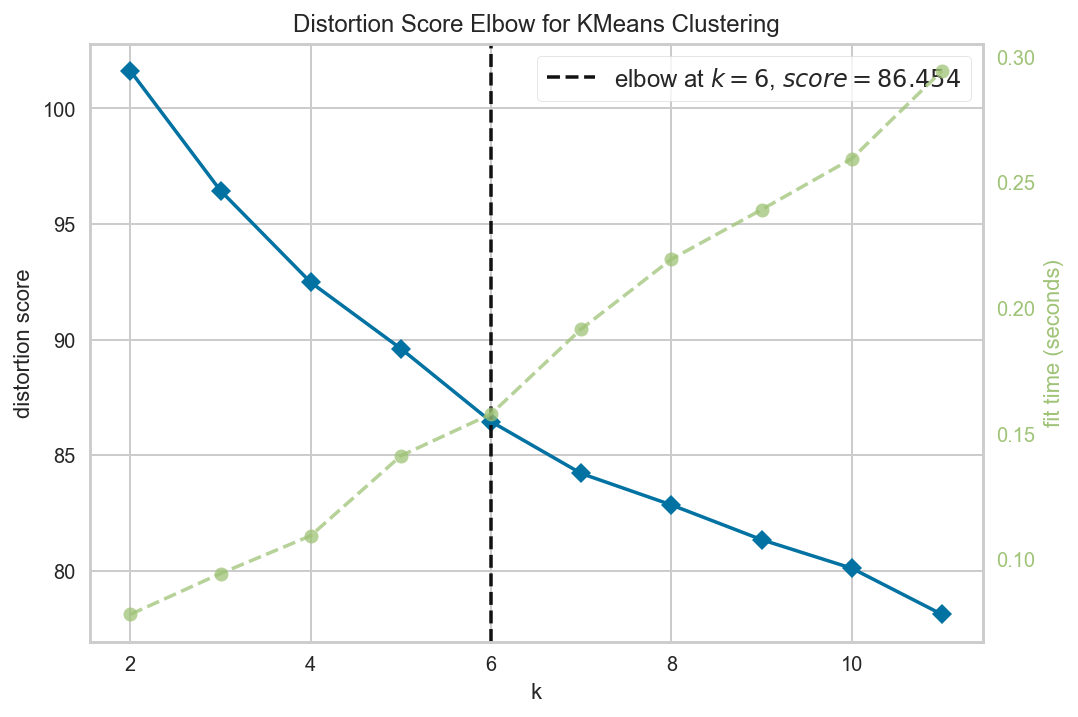

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12)).fit(X3)
visualizer.show()